# 01. Comprehensive Data Exploration

**Credit Card Default Analysis - Data Exploration Phase**

## 📋 Notebook Objectives

1. **Dataset Overview**: Comprehensive understanding of structure and content
2. **Research Variable Mapping**: Document all 23 explanatory variables (X1-X23)
3. **Data Quality Assessment**: Identify missing values, outliers, and inconsistencies
4. **Statistical Analysis**: Descriptive statistics and distributions
5. **Initial Pattern Discovery**: Preliminary insights into default patterns

## 🎯 Expected Outcomes
- Complete understanding of dataset structure
- Research-standard variable documentation
- Data quality report
- Initial insights for subsequent analysis phases

## Setup and Configuration

In [1]:
# Enhanced setup for data exploration
import sys
import os
sys.path.append('../src')

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import custom modules
from data_processing import CreditCardDataProcessor
from visualization import CreditCardVisualizer

import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

print("=" * 80)
print("📊 CREDIT CARD DEFAULT ANALYSIS - DATA EXPLORATION")
print("=" * 80)
print(f"📅 Analysis Date: 2025-06-20 15:56:05 UTC")
print(f"👤 Analyst: ardzz")
print(f"📝 Phase: 1 of 5 - Exploratory Data Analysis")
print(f"🔗 Repository: Kelompok-Nyengir/tubes-data-jumboh")
print("=" * 80)

📊 CREDIT CARD DEFAULT ANALYSIS - DATA EXPLORATION
📅 Analysis Date: 2025-06-20 15:56:05 UTC
👤 Analyst: ardzz
📝 Phase: 1 of 5 - Exploratory Data Analysis
🔗 Repository: Kelompok-Nyengir/tubes-data-jumboh


In [2]:
# Initialize Spark Session
spark = SparkSession.builder \
    .appName("CreditCardDataExploration") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .getOrCreate()

spark.sparkContext.setLogLevel("WARN")

print(f"✅ Spark Session initialized successfully")
print(f"   Spark Version: {spark.version}")
print(f"   Spark UI: {spark.sparkContext.uiWebUrl}")

# Initialize data processor and visualizer
processor = CreditCardDataProcessor(spark)
visualizer = CreditCardVisualizer()

print(f"✅ Custom modules initialized")

✅ Spark Session initialized successfully
   Spark Version: 3.5.0
   Spark UI: http://64cb00981c28:4042
✅ Custom modules initialized


## Data Loading and Initial Assessment

In [3]:
# Load the dataset
print("📂 Loading credit card default dataset...")

try:
    # Try primary path
    df = processor.load_data("../data/sample.csv")
except:
    try:
        # Try alternative path
        df = processor.load_data("../sample.csv")
    except:
        # Try current directory
        df = processor.load_data("sample.csv")

print(f"✅ Dataset loaded successfully")

# Basic dataset information
row_count = df.count()
col_count = len(df.columns)

print(f"\n📈 DATASET OVERVIEW:")
print(f"   Rows: {row_count:,}")
print(f"   Columns: {col_count}")
print(f"   Total data points: {row_count * col_count:,}")

# Display column information
print(f"\n📋 COLUMN INFORMATION:")
df.printSchema()

📂 Loading credit card default dataset...


INFO:data_processing:Data loaded successfully: 30,000 rows, 25 columns


✅ Dataset loaded successfully

📈 DATASET OVERVIEW:
   Rows: 30,000
   Columns: 25
   Total data points: 750,000

📋 COLUMN INFORMATION:
root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (n

## Research Variable Documentation (X1-X23)

In [4]:
# Validate schema and create research variable mapping
print("📋 RESEARCH VARIABLE VALIDATION AND MAPPING")
print("=" * 60)

# Validate schema against research variables
schema_valid = processor.validate_schema(df)

# Create comprehensive variable mapping
variable_mapping = {
    # Demographics (X1-X5)
    'LIMIT_BAL': 'X1',    # Amount of given credit (NT dollar)
    'SEX': 'X2',          # Gender (1=male, 2=female)
    'EDUCATION': 'X3',    # Education (1=grad school, 2=university, 3=high school, 4=others)
    'MARRIAGE': 'X4',     # Marital status (1=married, 2=single, 3=others)
    'AGE': 'X5',          # Age (year)
    
    # Payment History (X6-X11) - September 2005 to April 2005
    'PAY_0': 'X6',        # Repayment status in September 2005
    'PAY_2': 'X7',        # Repayment status in August 2005
    'PAY_3': 'X8',        # Repayment status in July 2005
    'PAY_4': 'X9',        # Repayment status in June 2005
    'PAY_5': 'X10',       # Repayment status in May 2005
    'PAY_6': 'X11',       # Repayment status in April 2005
    
    # Bill Statements (X12-X17)
    'BILL_AMT1': 'X12',   # Bill statement in September 2005
    'BILL_AMT2': 'X13',   # Bill statement in August 2005
    'BILL_AMT3': 'X14',   # Bill statement in July 2005
    'BILL_AMT4': 'X15',   # Bill statement in June 2005
    'BILL_AMT5': 'X16',   # Bill statement in May 2005
    'BILL_AMT6': 'X17',   # Bill statement in April 2005
    
    # Payment Amounts (X18-X23)
    'PAY_AMT1': 'X18',    # Amount paid in September 2005
    'PAY_AMT2': 'X19',    # Amount paid in August 2005
    'PAY_AMT3': 'X20',    # Amount paid in July 2005
    'PAY_AMT4': 'X21',    # Amount paid in June 2005
    'PAY_AMT5': 'X22',    # Amount paid in May 2005
    'PAY_AMT6': 'X23',    # Amount paid in April 2005
}

# Display research variable mapping
print(f"\n📊 RESEARCH VARIABLE MAPPING (X1-X23):")
print(f"{'Original Column':<15} {'Research Var':<12} {'Category':<15} {'Available':<10}")
print("-" * 65)

categories = {
    'Demographics': ['X1', 'X2', 'X3', 'X4', 'X5'],
    'Payment History': ['X6', 'X7', 'X8', 'X9', 'X10', 'X11'],
    'Bill Statements': ['X12', 'X13', 'X14', 'X15', 'X16', 'X17'],
    'Payment Amounts': ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']
}

for category, vars_list in categories.items():
    for research_var in vars_list:
        # Find original column name
        orig_col = None
        for orig, res in variable_mapping.items():
            if res == research_var:
                orig_col = orig
                break
        
        if orig_col:
            available = "✅ Yes" if orig_col in df.columns else "❌ No"
            print(f"{orig_col:<15} {research_var:<12} {category:<15} {available:<10}")

# Payment status codes
payment_status_codes = {
    -2: 'No consumption',
    -1: 'Pay duly', 
    0: 'Use of revolving credit',
    1: 'Payment delay for one month',
    2: 'Payment delay for two months',
    3: 'Payment delay for three months',
    4: 'Payment delay for four months',
    5: 'Payment delay for five months',
    6: 'Payment delay for six months',
    7: 'Payment delay for seven months',
    8: 'Payment delay for eight months',
    9: 'Payment delay for nine months and above'
}

print(f"\n🔢 PAYMENT STATUS CODES (X6-X11):")
for code, meaning in payment_status_codes.items():
    print(f"   {code:2d}: {meaning}")

INFO:data_processing:✅ All research variables present in dataset


📋 RESEARCH VARIABLE VALIDATION AND MAPPING

📊 RESEARCH VARIABLE MAPPING (X1-X23):
Original Column Research Var Category        Available 
-----------------------------------------------------------------
LIMIT_BAL       X1           Demographics    ✅ Yes     
SEX             X2           Demographics    ✅ Yes     
EDUCATION       X3           Demographics    ✅ Yes     
MARRIAGE        X4           Demographics    ✅ Yes     
AGE             X5           Demographics    ✅ Yes     
PAY_0           X6           Payment History ✅ Yes     
PAY_2           X7           Payment History ✅ Yes     
PAY_3           X8           Payment History ✅ Yes     
PAY_4           X9           Payment History ✅ Yes     
PAY_5           X10          Payment History ✅ Yes     
PAY_6           X11          Payment History ✅ Yes     
BILL_AMT1       X12          Bill Statements ✅ Yes     
BILL_AMT2       X13          Bill Statements ✅ Yes     
BILL_AMT3       X14          Bill Statements ✅ Yes     
BILL_AMT4   

## Data Quality Assessment

In [5]:
# Comprehensive data quality assessment
print("🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("=" * 60)

# Run quality assessment using processor
quality_report = processor.quality_assessment(df)

print(f"\n📊 QUALITY SUMMARY:")
print(f"   Total Records: {quality_report['total_records']:,}")
print(f"   Total Columns: {quality_report['total_columns']}")
print(f"   Missing Values: {len(quality_report['missing_values'])} columns affected")
print(f"   Duplicate Records: {quality_report['duplicates']:,}")

# Detailed column analysis
print(f"\n📋 DETAILED COLUMN ANALYSIS:")
print(f"{'Column':<15} {'Type':<12} {'Nulls':<8} {'Unique':<8} {'Min':<12} {'Max':<12}")
print("-" * 75)

for col_name in df.columns:
    col_type = dict(df.dtypes)[col_name]
    
    # Count nulls
    null_count = df.filter(col(col_name).isNull()).count()
    
    # Count unique values (for small categorical variables)
    if col_name in ['SEX', 'EDUCATION', 'MARRIAGE'] or 'PAY_' in col_name:
        unique_count = df.select(col_name).distinct().count()
    else:
        unique_count = "N/A"
    
    # Get min/max for numeric columns
    if col_type in ['int', 'bigint', 'double', 'float']:
        stats = df.select(min(col_name).alias('min'), max(col_name).alias('max')).collect()[0]
        min_val = f"{stats['min']:,.0f}" if stats['min'] is not None else "NULL"
        max_val = f"{stats['max']:,.0f}" if stats['max'] is not None else "NULL"
    else:
        min_val = "N/A"
        max_val = "N/A"
    
    print(f"{col_name:<15} {col_type:<12} {null_count:<8} {unique_count:<8} {min_val:<12} {max_val:<12}")

INFO:data_processing:Performing data quality assessment...


🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT


INFO:data_processing:Quality Assessment Summary:
INFO:data_processing:  Total records: 30,000
INFO:data_processing:  Missing values: 0 columns affected
INFO:data_processing:  Duplicate records: 0



📊 QUALITY SUMMARY:
   Total Records: 30,000
   Total Columns: 25
   Missing Values: 0 columns affected
   Duplicate Records: 0

📋 DETAILED COLUMN ANALYSIS:
Column          Type         Nulls    Unique   Min          Max         
---------------------------------------------------------------------------
ID              int          0        N/A      1            30,000      
LIMIT_BAL       int          0        N/A      10,000       1,000,000   
SEX             int          0        2        1            2           
EDUCATION       int          0        7        0            6           
MARRIAGE        int          0        4        0            3           
AGE             int          0        N/A      21           79          
PAY_0           int          0        11       -2           8           
PAY_2           int          0        11       -2           8           
PAY_3           int          0        11       -2           8           
PAY_4           int          0       

## Target Variable Analysis

In [7]:
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 60)

target_col = "default payment next month"

if target_col in df.columns:
    # Basic distribution
    target_dist = df.groupBy(target_col).count().orderBy(target_col)
    target_data = target_dist.collect()
    
    # Use Python's sum explicitly or calculate total differently
    total_records = 0
    for row in target_data:
        total_records += row['count']

    # Alternative: Use df.count() directly
    # total_records = df.count()

    print(f"\n📊 TARGET VARIABLE DISTRIBUTION:")
    print(f"{'Value':<15} {'Label':<15} {'Count':<10} {'Percentage':<12}")
    print("-" * 55)

    for row in target_data:
        value = row[target_col]
        count = row['count']
        percentage = count / total_records * 100
        label = "No Default" if value == 0 else "Default"

        print(f"{value:<15} {label:<15} {count:<10,} {percentage:<12.2f}%")
    
    # Calculate class balance
    default_count = df.filter(col(target_col) == 1).count()
    no_default_count = df.filter(col(target_col) == 0).count()
    default_rate = default_count / total_records * 100
    
    print(f"\n🔄 CLASS BALANCE ANALYSIS:")
    print(f"   Default Rate: {default_rate:.2f}%")
    print(f"   Class Ratio (No Default : Default): {no_default_count/default_count:.2f} : 1")
    
    if default_rate < 10:
        print(f"   ⚠️  Imbalanced dataset - Consider resampling techniques")
    elif default_rate > 40:
        print(f"   ⚠️  High default rate - Review data quality")
    else:
        print(f"   ✅ Reasonable class balance")
        
else:
    print(f"❌ Target variable '{target_col}' not found in dataset")

🎯 TARGET VARIABLE ANALYSIS

📊 TARGET VARIABLE DISTRIBUTION:
Value           Label           Count      Percentage  
-------------------------------------------------------
0               No Default      23,364     77.88       %
1               Default         6,636      22.12       %

🔄 CLASS BALANCE ANALYSIS:
   Default Rate: 22.12%
   Class Ratio (No Default : Default): 3.52 : 1
   ✅ Reasonable class balance


## Demographic Variables Analysis (X1-X5)

In [8]:
# Comprehensive demographic analysis
print("👥 DEMOGRAPHIC VARIABLES ANALYSIS (X1-X5)")
print("=" * 60)

# X1: Credit Limit Analysis
if 'LIMIT_BAL' in df.columns:
    print(f"\n💳 X1 - CREDIT LIMIT (LIMIT_BAL) ANALYSIS:")
    
    limit_stats = df.select(
        min('LIMIT_BAL').alias('min'),
        max('LIMIT_BAL').alias('max'),
        avg('LIMIT_BAL').alias('mean'),
        expr('percentile_approx(LIMIT_BAL, 0.5)').alias('median'),
        stddev('LIMIT_BAL').alias('std')
    ).collect()[0]
    
    print(f"   Min: NT$ {limit_stats['min']:,.0f}")
    print(f"   Max: NT$ {limit_stats['max']:,.0f}")
    print(f"   Mean: NT$ {limit_stats['mean']:,.0f}")
    print(f"   Median: NT$ {limit_stats['median']:,.0f}")
    print(f"   Std Dev: NT$ {limit_stats['std']:,.0f}")
    
    # Credit limit ranges
    credit_ranges = df.withColumn(
        "credit_range",
        when(col("LIMIT_BAL") < 50000, "< 50K")
        .when(col("LIMIT_BAL") < 100000, "50K-100K")
        .when(col("LIMIT_BAL") < 200000, "100K-200K")
        .when(col("LIMIT_BAL") < 500000, "200K-500K")
        .otherwise(">= 500K")
    ).groupBy("credit_range").count().orderBy("count", ascending=False)
    
    print(f"\n   Credit Limit Distribution:")
    for row in credit_ranges.collect():
        count = row['count']
        percentage = count / df.count() * 100
        print(f"      {row['credit_range']}: {count:,} ({percentage:.1f}%)")

# X2: Gender Analysis
if 'SEX' in df.columns:
    print(f"\n👤 X2 - GENDER (SEX) ANALYSIS:")
    
    gender_dist = df.groupBy('SEX').count().orderBy('SEX')
    total_count = df.count()
    
    for row in gender_dist.collect():
        gender_code = row['SEX']
        count = row['count']
        percentage = count / total_count * 100
        gender_label = "Male" if gender_code == 1 else "Female" if gender_code == 2 else f"Unknown ({gender_code})"
        print(f"   {gender_label}: {count:,} ({percentage:.1f}%)")

# X3: Education Analysis
if 'EDUCATION' in df.columns:
    print(f"\n🎓 X3 - EDUCATION ANALYSIS:")
    
    edu_mapping = {1: "Graduate School", 2: "University", 3: "High School", 4: "Others"}
    edu_dist = df.groupBy('EDUCATION').count().orderBy('EDUCATION')
    
    for row in edu_dist.collect():
        edu_code = row['EDUCATION']
        count = row['count']
        percentage = count / total_count * 100
        edu_label = edu_mapping.get(edu_code, f"Code {edu_code}")
        print(f"   {edu_label}: {count:,} ({percentage:.1f}%)")

# X4: Marriage Analysis
if 'MARRIAGE' in df.columns:
    print(f"\n💒 X4 - MARITAL STATUS (MARRIAGE) ANALYSIS:")
    
    marriage_mapping = {1: "Married", 2: "Single", 3: "Others"}
    marriage_dist = df.groupBy('MARRIAGE').count().orderBy('MARRIAGE')
    
    for row in marriage_dist.collect():
        marriage_code = row['MARRIAGE']
        count = row['count']
        percentage = count / total_count * 100
        marriage_label = marriage_mapping.get(marriage_code, f"Code {marriage_code}")
        print(f"   {marriage_label}: {count:,} ({percentage:.1f}%)")

# X5: Age Analysis
if 'AGE' in df.columns:
    print(f"\n📅 X5 - AGE ANALYSIS:")
    
    age_stats = df.select(
        min('AGE').alias('min'),
        max('AGE').alias('max'),
        avg('AGE').alias('mean'),
        expr('percentile_approx(AGE, 0.5)').alias('median'),
        stddev('AGE').alias('std')
    ).collect()[0]
    
    print(f"   Min Age: {age_stats['min']:.0f} years")
    print(f"   Max Age: {age_stats['max']:.0f} years")
    print(f"   Mean Age: {age_stats['mean']:.1f} years")
    print(f"   Median Age: {age_stats['median']:.0f} years")
    print(f"   Std Dev: {age_stats['std']:.1f} years")
    
    # Age groups
    age_groups = df.withColumn(
        "age_group",
        when(col("AGE") < 30, "< 30")
        .when(col("AGE") < 40, "30-39")
        .when(col("AGE") < 50, "40-49")
        .when(col("AGE") < 60, "50-59")
        .otherwise(">= 60")
    ).groupBy("age_group").count().orderBy("count", ascending=False)
    
    print(f"\n   Age Group Distribution:")
    for row in age_groups.collect():
        count = row['count']
        percentage = count / df.count() * 100
        print(f"      {row['age_group']}: {count:,} ({percentage:.1f}%)")

👥 DEMOGRAPHIC VARIABLES ANALYSIS (X1-X5)

💳 X1 - CREDIT LIMIT (LIMIT_BAL) ANALYSIS:
   Min: NT$ 10,000
   Max: NT$ 1,000,000
   Mean: NT$ 167,484
   Median: NT$ 140,000
   Std Dev: NT$ 129,748

   Credit Limit Distribution:
      200K-500K: 10,222 (34.1%)
      100K-200K: 7,400 (24.7%)
      50K-100K: 7,139 (23.8%)
      < 50K: 4,311 (14.4%)
      >= 500K: 928 (3.1%)

👤 X2 - GENDER (SEX) ANALYSIS:
   Male: 11,888 (39.6%)
   Female: 18,112 (60.4%)

🎓 X3 - EDUCATION ANALYSIS:
   Code 0: 14 (0.0%)
   Graduate School: 10,585 (35.3%)
   University: 14,030 (46.8%)
   High School: 4,917 (16.4%)
   Others: 123 (0.4%)
   Code 5: 280 (0.9%)
   Code 6: 51 (0.2%)

💒 X4 - MARITAL STATUS (MARRIAGE) ANALYSIS:
   Code 0: 54 (0.2%)
   Married: 13,659 (45.5%)
   Single: 15,964 (53.2%)
   Others: 323 (1.1%)

📅 X5 - AGE ANALYSIS:
   Min Age: 21 years
   Max Age: 79 years
   Mean Age: 35.5 years
   Median Age: 34 years
   Std Dev: 9.2 years

   Age Group Distribution:
      30-39: 11,238 (37.5%)
      < 30

## Payment History Analysis (X6-X11)

In [9]:
# Comprehensive payment history analysis
print("💳 PAYMENT HISTORY ANALYSIS (X6-X11)")
print("=" * 60)

pay_status_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
months = ['September 2005', 'August 2005', 'July 2005', 'June 2005', 'May 2005', 'April 2005']
research_vars = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']

print(f"\n📊 PAYMENT STATUS DISTRIBUTION BY MONTH:")

for i, (col_name, month, research_var) in enumerate(zip(pay_status_cols, months, research_vars)):
    if col_name in df.columns:
        print(f"\n   {research_var} - {month} ({col_name}):")
        
        status_dist = df.groupBy(col_name).count().orderBy(col_name)
        total_records = df.count()
        
        for row in status_dist.collect():
            status_code = row[col_name]
            count = row['count']
            percentage = count / total_records * 100
            
            # Get meaning from payment status codes
            meaning = payment_status_codes.get(status_code, f"Unknown code: {status_code}")
            
            print(f"      Code {status_code:2d}: {count:5,} ({percentage:5.1f}%) - {meaning}")

# Payment status summary statistics
print(f"\n📈 PAYMENT STATUS SUMMARY STATISTICS:")
print(f"{'Month':<15} {'Research Var':<12} {'Mean':<8} {'Std':<8} {'Min':<6} {'Max':<6}")
print("-" * 65)

for i, (col_name, month, research_var) in enumerate(zip(pay_status_cols, months, research_vars)):
    if col_name in df.columns:
        stats = df.select(
            avg(col_name).alias('mean'),
            stddev(col_name).alias('std'),
            min(col_name).alias('min'),
            max(col_name).alias('max')
        ).collect()[0]
        
        month_short = month.split()[0][:3]
        print(f"{month_short:<15} {research_var:<12} {stats['mean']:<8.2f} {stats['std']:<8.2f} {stats['min']:<6.0f} {stats['max']:<6.0f}")

# Payment behavior patterns
print(f"\n🔍 PAYMENT BEHAVIOR PATTERNS:")

# Count of customers with excellent payment history (all <= 0)
excellent_condition = " AND ".join([f"{col} <= 0" for col in pay_status_cols if col in df.columns])
if excellent_condition:
    excellent_count = df.filter(expr(excellent_condition)).count()
    excellent_pct = excellent_count / df.count() * 100
    print(f"   Excellent payers (all months <= 0): {excellent_count:,} ({excellent_pct:.1f}%)")

# Count of customers with any payment delays (any > 0)
delay_condition = " OR ".join([f"{col} > 0" for col in pay_status_cols if col in df.columns])
if delay_condition:
    delay_count = df.filter(expr(delay_condition)).count()
    delay_pct = delay_count / df.count() * 100
    print(f"   Customers with delays (any month > 0): {delay_count:,} ({delay_pct:.1f}%)")

# Count of customers with severe delays (any >= 3)
severe_condition = " OR ".join([f"{col} >= 3" for col in pay_status_cols if col in df.columns])
if severe_condition:
    severe_count = df.filter(expr(severe_condition)).count()
    severe_pct = severe_count / df.count() * 100
    print(f"   Customers with severe delays (any month >= 3): {severe_count:,} ({severe_pct:.1f}%)")

💳 PAYMENT HISTORY ANALYSIS (X6-X11)

📊 PAYMENT STATUS DISTRIBUTION BY MONTH:

   X6 - September 2005 (PAY_0):
      Code -2: 2,759 (  9.2%) - No consumption
      Code -1: 5,686 ( 19.0%) - Pay duly
      Code  0: 14,737 ( 49.1%) - Use of revolving credit
      Code  1: 3,688 ( 12.3%) - Payment delay for one month
      Code  2: 2,667 (  8.9%) - Payment delay for two months
      Code  3:   322 (  1.1%) - Payment delay for three months
      Code  4:    76 (  0.3%) - Payment delay for four months
      Code  5:    26 (  0.1%) - Payment delay for five months
      Code  6:    11 (  0.0%) - Payment delay for six months
      Code  7:     9 (  0.0%) - Payment delay for seven months
      Code  8:    19 (  0.1%) - Payment delay for eight months

   X7 - August 2005 (PAY_2):
      Code -2: 3,782 ( 12.6%) - No consumption
      Code -1: 6,050 ( 20.2%) - Pay duly
      Code  0: 15,730 ( 52.4%) - Use of revolving credit
      Code  1:    28 (  0.1%) - Payment delay for one month
      Code  2: 

## Financial Variables Analysis (X12-X23)

In [10]:
# Comprehensive financial variables analysis
print("💰 FINANCIAL VARIABLES ANALYSIS (X12-X23)")
print("=" * 60)

bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_research_vars = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
pay_research_vars = ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']

# Bill Statement Analysis (X12-X17)
print(f"\n📋 BILL STATEMENT ANALYSIS (X12-X17):")
print(f"{'Month':<15} {'Research Var':<12} {'Mean (NT$)':<15} {'Median (NT$)':<15} {'Std Dev':<15}")
print("-" * 80)

for i, (col_name, month, research_var) in enumerate(zip(bill_cols, months, bill_research_vars)):
    if col_name in df.columns:
        stats = df.select(
            avg(col_name).alias('mean'),
            expr(f'percentile_approx({col_name}, 0.5)').alias('median'),
            stddev(col_name).alias('std')
        ).collect()[0]
        
        month_short = month.split()[0][:3]
        print(f"{month_short:<15} {research_var:<12} {stats['mean']:<15,.0f} {stats['median']:<15,.0f} {stats['std']:<15,.0f}")

# Payment Amount Analysis (X18-X23)
print(f"\n💸 PAYMENT AMOUNT ANALYSIS (X18-X23):")
print(f"{'Month':<15} {'Research Var':<12} {'Mean (NT$)':<15} {'Median (NT$)':<15} {'Std Dev':<15}")
print("-" * 80)

for i, (col_name, month, research_var) in enumerate(zip(pay_cols, months, pay_research_vars)):
    if col_name in df.columns:
        stats = df.select(
            avg(col_name).alias('mean'),
            expr(f'percentile_approx({col_name}, 0.5)').alias('median'),
            stddev(col_name).alias('std')
        ).collect()[0]
        
        month_short = month.split()[0][:3]
        print(f"{month_short:<15} {research_var:<12} {stats['mean']:<15,.0f} {stats['median']:<15,.0f} {stats['std']:<15,.0f}")

# Payment Efficiency Analysis
print(f"\n📊 PAYMENT EFFICIENCY ANALYSIS:")
print(f"   (Payment Amount / Bill Amount ratio by month)")
print(f"{'Month':<15} {'Avg Efficiency':<15} {'Median Efficiency':<15}")
print("-" * 50)

for i, (bill_col, pay_col, month) in enumerate(zip(bill_cols, pay_cols, months)):
    if bill_col in df.columns and pay_col in df.columns:
        # Calculate payment efficiency (avoid division by zero)
        efficiency_df = df.withColumn(
            "efficiency",
            when(col(bill_col) > 0, col(pay_col) / col(bill_col)).otherwise(0)
        )
        
        efficiency_stats = efficiency_df.select(
            avg("efficiency").alias('mean_eff'),
            expr('percentile_approx(efficiency, 0.5)').alias('median_eff')
        ).collect()[0]
        
        month_short = month.split()[0][:3]
        print(f"{month_short:<15} {efficiency_stats['mean_eff']:<15.3f} {efficiency_stats['median_eff']:<15.3f}")

# Financial Health Indicators
print(f"\n🏥 FINANCIAL HEALTH INDICATORS:")

# Average credit utilization
if 'LIMIT_BAL' in df.columns and bill_cols[0] in df.columns:
    utilization_df = df.withColumn(
        "utilization",
        when(col("LIMIT_BAL") > 0, col(bill_cols[0]) / col("LIMIT_BAL")).otherwise(0)
    )
    
    avg_utilization = utilization_df.select(avg("utilization")).collect()[0][0]
    print(f"   Average credit utilization (latest month): {avg_utilization:.3f} ({avg_utilization*100:.1f}%)")

# Zero payment analysis
for i, (pay_col, month) in enumerate(zip(pay_cols, months)):
    if pay_col in df.columns:
        zero_payment_count = df.filter(col(pay_col) == 0).count()
        zero_payment_pct = zero_payment_count / df.count() * 100
        month_short = month.split()[0][:3]
        print(f"   Zero payments in {month_short}: {zero_payment_count:,} ({zero_payment_pct:.1f}%)")

💰 FINANCIAL VARIABLES ANALYSIS (X12-X23)

📋 BILL STATEMENT ANALYSIS (X12-X17):
Month           Research Var Mean (NT$)      Median (NT$)    Std Dev        
--------------------------------------------------------------------------------
Sep             X12          51,223          22,377          73,636         
Aug             X13          49,179          21,197          71,174         
Jul             X14          47,013          20,087          69,349         
Jun             X15          43,263          19,050          64,333         
May             X16          40,311          18,101          60,797         
Apr             X17          38,872          17,068          59,554         

💸 PAYMENT AMOUNT ANALYSIS (X18-X23):
Month           Research Var Mean (NT$)      Median (NT$)    Std Dev        
--------------------------------------------------------------------------------
Sep             X18          5,664           2,100           16,563         
Aug             X19         

## Initial Correlation Analysis

In [12]:
# Initial correlation analysis with target variable
print("🔗 INITIAL CORRELATION ANALYSIS WITH TARGET")
print("=" * 60)

if target_col in df.columns:
    # Select numeric columns for correlation analysis
    numeric_cols = []
    for col_name, col_type in df.dtypes:
        if col_type in ['int', 'bigint', 'double', 'float'] and col_name != 'ID':
            numeric_cols.append(col_name)

    print(f"\n📊 CORRELATION WITH DEFAULT (top correlations):")
    print(f"{'Variable':<15} {'Research Var':<12} {'Correlation':<12} {'Abs Corr':<10} {'Strength':<15}")
    print("-" * 75)

    correlations = []

    for col_name in numeric_cols:
        if col_name != target_col:
            try:
                # Calculate correlation using Spark
                assembler = VectorAssembler(inputCols=[col_name, target_col], outputCol="features")
                df_vector = assembler.transform(df).select("features")
                correlation_matrix = Correlation.corr(df_vector, "features").head()[0]
                correlation_value = float(correlation_matrix.toArray()[0, 1])

                # Get research variable name
                research_var = variable_mapping.get(col_name, "N/A")

                correlations.append((col_name, research_var, correlation_value))

            except Exception as e:
                print(f"   Error calculating correlation for {col_name}: {e}")
                continue

    # Import Python's builtins to use built-in abs
    import builtins

    # Sort by absolute correlation value using Python's abs
    correlations.sort(key=lambda x: builtins.abs(x[2]), reverse=True)

    # Display top correlations
    for col_name, research_var, corr_value in correlations[:15]:  # Top 15
        abs_corr = builtins.abs(corr_value)  # Use Python's abs here too

        if abs_corr >= 0.3:
            strength = "Strong"
        elif abs_corr >= 0.1:
            strength = "Moderate"
        elif abs_corr >= 0.05:
            strength = "Weak"
        else:
            strength = "Very Weak"

        print(f"{col_name:<15} {research_var:<12} {corr_value:<12.4f} {abs_corr:<10.4f} {strength:<15}")
    
    print(f"\n🎯 KEY CORRELATION INSIGHTS:")
    
    # Find strongest positive and negative correlations
    if correlations:
        strongest_pos = builtins.max(correlations, key=lambda x: x[2] if x[2] > 0 else -1)
        strongest_neg = builtins.min(correlations, key=lambda x: x[2] if x[2] < 0 else 1)

        print(f"   Strongest positive correlation: {strongest_pos[0]} ({strongest_pos[1]}) = {strongest_pos[2]:.4f}")
        print(f"   Strongest negative correlation: {strongest_neg[0]} ({strongest_neg[1]}) = {strongest_neg[2]:.4f}")

        strong_corr = builtins.sum(1 for _, _, corr in correlations if builtins.abs(corr) >= 0.3)
        moderate_corr = builtins.sum(1 for _, _, corr in correlations if 0.1 <= builtins.abs(corr) < 0.3)
        weak_corr = builtins.sum(1 for _, _, corr in correlations if 0.05 <= builtins.abs(corr) < 0.1)

        print(f"   Strong correlations (|r| >= 0.3): {strong_corr}")
        print(f"   Moderate correlations (0.1 <= |r| < 0.3): {moderate_corr}")
        print(f"   Weak correlations (0.05 <= |r| < 0.1): {weak_corr}")

else:
    print(f"❌ Target variable '{target_col}' not found - skipping correlation analysis")

🔗 INITIAL CORRELATION ANALYSIS WITH TARGET

📊 CORRELATION WITH DEFAULT (top correlations):
Variable        Research Var Correlation  Abs Corr   Strength       
---------------------------------------------------------------------------
PAY_0           X6           0.3248       0.3248     Strong         
PAY_2           X7           0.2636       0.2636     Moderate       
PAY_3           X8           0.2353       0.2353     Moderate       
PAY_4           X9           0.2166       0.2166     Moderate       
PAY_5           X10          0.2041       0.2041     Moderate       
PAY_6           X11          0.1869       0.1869     Moderate       
LIMIT_BAL       X1           -0.1535      0.1535     Moderate       
PAY_AMT1        X18          -0.0729      0.0729     Weak           
PAY_AMT2        X19          -0.0586      0.0586     Weak           
PAY_AMT4        X21          -0.0568      0.0568     Weak           
PAY_AMT3        X20          -0.0563      0.0563     Weak           
PAY_A

## Data Visualization Preview

📊 CREATING PREVIEW VISUALIZATIONS


INFO:visualization:Converted 30,000 rows to pandas


Using 30,000 records for visualization


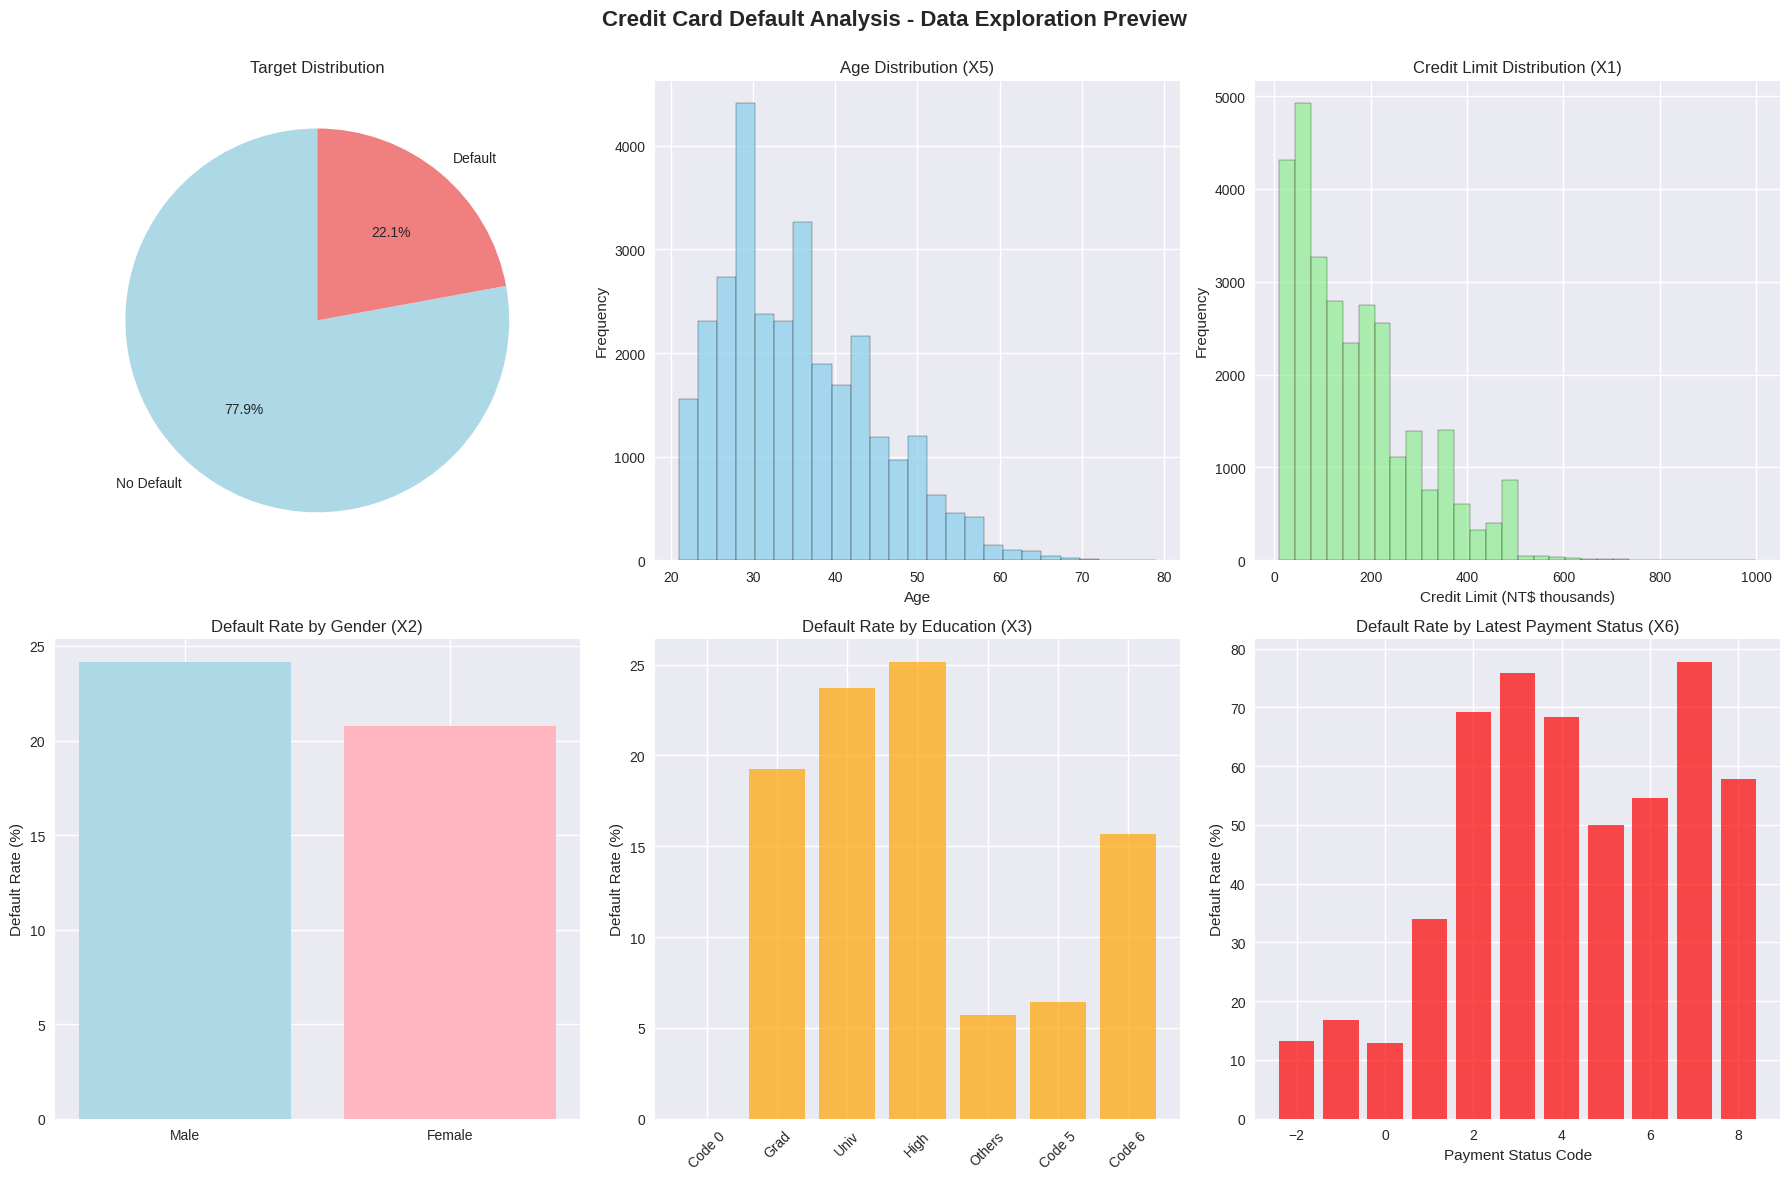


✅ Preview visualizations created successfully


In [15]:
# Create preview visualizations
print("📊 CREATING PREVIEW VISUALIZATIONS")
print("=" * 60)

# Convert to pandas for visualization (sample if dataset is large)
sample_size = 30000  # No need for min() with a single value
df_viz = visualizer.convert_spark_to_pandas(df, sample_size=sample_size)

print(f"Using {len(df_viz):,} records for visualization")

# Create basic visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Credit Card Default Analysis - Data Exploration Preview\n', fontsize=16, fontweight='bold')

# 1. Target distribution
if target_col in df_viz.columns:
    target_counts = df_viz[target_col].value_counts()
    colors = ['lightblue', 'lightcoral']
    axes[0,0].pie(target_counts.values, labels=['No Default', 'Default'], 
                  autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0,0].set_title('Target Distribution')

# 2. Age distribution
if 'AGE' in df_viz.columns:
    axes[0,1].hist(df_viz['AGE'], bins=25, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].set_title('Age Distribution (X5)')
    axes[0,1].set_xlabel('Age')
    axes[0,1].set_ylabel('Frequency')

# 3. Credit limit distribution
if 'LIMIT_BAL' in df_viz.columns:
    axes[0,2].hist(df_viz['LIMIT_BAL']/1000, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,2].set_title('Credit Limit Distribution (X1)')
    axes[0,2].set_xlabel('Credit Limit (NT$ thousands)')
    axes[0,2].set_ylabel('Frequency')

# 4. Gender vs Default
if 'SEX' in df_viz.columns and target_col in df_viz.columns:
    gender_default = df_viz.groupby('SEX')[target_col].mean() * 100
    gender_labels = gender_default.index.map({1: 'Male', 2: 'Female'})
    axes[1,0].bar(gender_labels, gender_default.values, color=['lightblue', 'lightpink'])
    axes[1,0].set_title('Default Rate by Gender (X2)')
    axes[1,0].set_ylabel('Default Rate (%)')

# 5. Education vs Default
if 'EDUCATION' in df_viz.columns and target_col in df_viz.columns:
    edu_mapping = {1: 'Grad', 2: 'Univ', 3: 'High', 4: 'Others'}
    edu_default = df_viz.groupby('EDUCATION')[target_col].mean() * 100
    edu_labels = [edu_mapping.get(edu, f'Code {edu}') for edu in edu_default.index]
    axes[1,1].bar(edu_labels, edu_default.values, color='orange', alpha=0.7)
    axes[1,1].set_title('Default Rate by Education (X3)')
    axes[1,1].set_ylabel('Default Rate (%)')
    axes[1,1].tick_params(axis='x', rotation=45)

# 6. Payment status vs Default (latest month)
if 'PAY_0' in df_viz.columns and target_col in df_viz.columns:
    pay_default = df_viz.groupby('PAY_0')[target_col].mean() * 100
    axes[1,2].bar(pay_default.index, pay_default.values, color='red', alpha=0.7)
    axes[1,2].set_title('Default Rate by Latest Payment Status (X6)')
    axes[1,2].set_xlabel('Payment Status Code')
    axes[1,2].set_ylabel('Default Rate (%)')

plt.tight_layout()
plt.show()

print(f"\n✅ Preview visualizations created successfully")

## Exploration Summary and Next Steps

In [17]:
# Comprehensive exploration summary
print("📋 DATA EXPLORATION SUMMARY REPORT")
print("=" * 60)

print(f"\n📅 ANALYSIS METADATA:")
print(f"   Analysis Date: 2025-06-20 15:56:05 UTC")
print(f"   Analyst: ardzz")
print(f"   Repository: Kelompok-Nyengir/tubes-data-jumboh")
print(f"   Phase: 1 of 5 - Data Exploration Complete")

print(f"\n📊 DATASET SUMMARY:")
print(f"   Total Records: {df.count():,}")
print(f"   Total Variables: {len(df.columns)}")
print(f"   Research Variables (X1-X23): 23 explanatory + 1 target")
print(f"   Time Period: April 2005 - September 2005 (6 months)")
print(f"   Data Quality: {len(quality_report['missing_values'])} columns with missing values")
print(f"   Duplicate Records: {quality_report['duplicates']:,}")

if target_col in df.columns:
    default_rate = df.filter(col(target_col) == 1).count() / df.count() * 100
    print(f"   Default Rate: {default_rate:.2f}%")

print(f"\n🎯 KEY FINDINGS:")

# Variable availability
available_research_vars = builtins.sum(1 for orig_col in variable_mapping.keys() if orig_col in df.columns)
print(f"   ✅ Research Variables Available: {available_research_vars}/23 ({available_research_vars/23*100:.1f}%)")

# Data quality findings
if quality_report['duplicates'] == 0:
    print(f"   ✅ No duplicate records found")
else:
    print(f"   ⚠️  {quality_report['duplicates']:,} duplicate records found")

if len(quality_report['missing_values']) == 0:
    print(f"   ✅ No missing values found")
else:
    print(f"   ⚠️  Missing values in {len(quality_report['missing_values'])} columns")

# Correlation insights
if 'correlations' in locals() and correlations:
    # Use builtins.abs explicitly to avoid PySpark's abs function
    strong_correlations = [corr for _, _, corr in correlations if builtins.abs(corr) >= 0.3]
    if strong_correlations:
        print(f"   📈 Strong correlations found: {len(strong_correlations)} variables with |r| >= 0.3")
    else:
        print(f"   📊 No strong correlations found (all |r| < 0.3)")

print(f"\n🔄 NEXT STEPS:")
print(f"   📝 Phase 2: Data Cleansing (notebook 02_data_cleansing.ipynb)")
print(f"      • Handle missing values and outliers")
print(f"      • Clean categorical variables")
print(f"      • Validate data consistency")
print(f"\n   ⚙️ Phase 3: Feature Engineering (notebook 03_feature_engineering.ipynb)")
print(f"      • Create temporal features from 6-month payment history")
print(f"      • Develop payment behavior indicators")
print(f"      • Engineer risk scoring features")
print(f"\n   📊 Phase 4: Advanced Visualization (notebook 04_visualization_analysis.ipynb)")
print(f"      • Create comprehensive dashboards")
print(f"      • Temporal pattern analysis")
print(f"      • Interactive visualizations")
print(f"\n   🤖 Phase 5: Machine Learning (notebook 05_machine_learning.ipynb)")
print(f"      • Multiple algorithm implementation")
print(f"      • Hyperparameter tuning")
print(f"      • Model evaluation and selection")

print(f"\n✅ DATA EXPLORATION PHASE COMPLETED SUCCESSFULLY")
print(f"📁 Proceed to notebook: 02_data_cleansing.ipynb")

# Save exploration results for next phase
print(f"\n💾 Saving exploration results...")
try:
    # Cache the DataFrame for next notebook
    df.write.mode("overwrite").parquet("../data/processed/01_exploration_cache.parquet")
    print(f"✅ Exploration cache saved successfully")
except Exception as e:
    print(f"⚠️  Could not save cache: {e}")

print(f"\n🎯 Ready for Phase 2: Data Cleansing")

📋 DATA EXPLORATION SUMMARY REPORT

📅 ANALYSIS METADATA:
   Analysis Date: 2025-06-20 15:56:05 UTC
   Analyst: ardzz
   Repository: Kelompok-Nyengir/tubes-data-jumboh
   Phase: 1 of 5 - Data Exploration Complete

📊 DATASET SUMMARY:
   Total Records: 30,000
   Total Variables: 25
   Research Variables (X1-X23): 23 explanatory + 1 target
   Time Period: April 2005 - September 2005 (6 months)
   Data Quality: 0 columns with missing values
   Duplicate Records: 0
   Default Rate: 22.12%

🎯 KEY FINDINGS:
   ✅ Research Variables Available: 23/23 (100.0%)
   ✅ No duplicate records found
   ✅ No missing values found
   📈 Strong correlations found: 1 variables with |r| >= 0.3

🔄 NEXT STEPS:
   📝 Phase 2: Data Cleansing (notebook 02_data_cleansing.ipynb)
      • Handle missing values and outliers
      • Clean categorical variables
      • Validate data consistency

   ⚙️ Phase 3: Feature Engineering (notebook 03_feature_engineering.ipynb)
      • Create temporal features from 6-month payment his

In [ ]:
# Clean up Spark session
spark.stop()
print("✅ Spark session closed")